In [141]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [142]:
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,4.50,12300,13500,13200,10 Mar 2023
1,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,7.50,12525,14055,13500,03 May 2023
2,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,7.50,13000,14500,13800,05 Apr 2023
3,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,9.00,12500,13750,13650,02 May 2023
4,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,10.50,12100,13550,13050,20 Mar 2023
...,...,...,...,...,...,...,...,...,...,...
2608,Gujarat,Rajkot,Rajkot,White,Oil Seeds,876.50,6900,8375,7500,26 May 2020
2609,Gujarat,Rajkot,Rajkot,White,Oil Seeds,920.00,12000,13200,12850,01 Jun 2023
2610,Gujarat,Rajkot,Rajkot,White,Oil Seeds,"1,018.00",6750,8500,7925,28 May 2020
2611,Gujarat,Rajkot,Rajkot,White,Oil Seeds,"1,110.00",7000,9250,8215,08 Jun 2020


In [143]:
df = df[df["Variety"]=="White"]
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
1306,Gujarat,Rajkot,Rajkot,White,Oil Seeds,4.50,12500,14000,13500,10 Mar 2023
1307,Gujarat,Rajkot,Rajkot,White,Oil Seeds,5.00,14000,15500,15000,25 Mar 2023
1308,Gujarat,Rajkot,Rajkot,White,Oil Seeds,7.50,13000,14720,13750,03 May 2023
1309,Gujarat,Rajkot,Rajkot,White,Oil Seeds,7.50,13175,15500,14000,05 Apr 2023
1310,Gujarat,Rajkot,Rajkot,White,Oil Seeds,9.00,13055,15000,13750,02 May 2023
...,...,...,...,...,...,...,...,...,...,...
2608,Gujarat,Rajkot,Rajkot,White,Oil Seeds,876.50,6900,8375,7500,26 May 2020
2609,Gujarat,Rajkot,Rajkot,White,Oil Seeds,920.00,12000,13200,12850,01 Jun 2023
2610,Gujarat,Rajkot,Rajkot,White,Oil Seeds,"1,018.00",6750,8500,7925,28 May 2020
2611,Gujarat,Rajkot,Rajkot,White,Oil Seeds,"1,110.00",7000,9250,8215,08 Jun 2020


In [144]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y').dt.date
df = df[['Reported Date', 'Arrivals (Tonnes)', 'Modal Price (Rs./Quintal)']]
df = df.sort_values(by='Reported Date', ascending=True)
df

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_24982/1356971737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y').dt.date


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
2096,2019-11-01,108.50,10650
2316,2019-11-02,165.50,10725
2470,2019-11-04,265.00,10750
2249,2019-11-05,141.00,10650
2487,2019-11-06,281.00,10700
...,...,...,...
2083,2024-11-08,106.00,11500
1937,2024-11-09,88.00,11600
2357,2024-11-11,185.00,11750
2220,2024-11-12,133.00,11800


In [145]:
start_date = df['Reported Date'].min()
end_date = df['Reported Date'].max()

# Generate a list of all dates between the start and end date
all_dates = pd.date_range(start=start_date, end=end_date).date

# Find missing dates by comparing with the actual dates in the dataframe
missing_dates = set(all_dates) - set(df['Reported Date'])

# Output the missing dates and their count
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Total missing dates: {len(missing_dates)}")

Start Date: 2019-11-01
End Date: 2024-11-13
Missing dates: [datetime.date(2019, 11, 3), datetime.date(2019, 11, 10), datetime.date(2019, 11, 13), datetime.date(2019, 11, 15), datetime.date(2019, 11, 17), datetime.date(2019, 11, 24), datetime.date(2019, 12, 1), datetime.date(2019, 12, 8), datetime.date(2019, 12, 15), datetime.date(2019, 12, 22), datetime.date(2019, 12, 29), datetime.date(2020, 1, 5), datetime.date(2020, 1, 12), datetime.date(2020, 1, 14), datetime.date(2020, 1, 19), datetime.date(2020, 1, 26), datetime.date(2020, 2, 2), datetime.date(2020, 2, 9), datetime.date(2020, 2, 13), datetime.date(2020, 2, 16), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), datetime.date(2020, 3, 1), datetime.date(2020, 3, 5), datetime.date(2020, 3, 8), datetime.date(2020, 3, 10), datetime.date(

In [146]:
def get_missing_percentage_by_year(start_date, end_date, reported_dates):
    missing_percentage_by_year = {}

    # Generate the date range from start to end date
    all_dates = pd.date_range(start=start_date, end=end_date).date

    # Loop over each year from start_date to end_date
    current_year = start_date.year
    while current_year <= end_date.year:
        # Determine the first and last date of the current year
        year_start = pd.to_datetime(f'{current_year}-01-01').date()
        year_end = pd.to_datetime(f'{current_year}-12-31').date()

        # If the year range overlaps with the provided date range, adjust it
        if year_start < start_date:
            year_start = start_date
        if year_end > end_date:
            year_end = end_date

        # Get all dates for the current year within the range
        year_dates = pd.date_range(start=year_start, end=year_end).date

        # Get missing dates for this year
        missing_year_dates = set(year_dates) - set(reported_dates)

        # Total days in the current year range
        total_days_in_year = len(year_dates)

        # Calculate missing percentage
        missing_percentage = (len(missing_year_dates) / total_days_in_year) * 100

        # Store the result
        missing_percentage_by_year[current_year] = {
            'missing_percentage': missing_percentage,
            'total_days': total_days_in_year,
            'missing_dates': sorted(missing_year_dates)
        }

        # Move to the next year
        current_year += 1

    return missing_percentage_by_year

# Calculate missing percentage yearwise
missing_percentage_by_year = get_missing_percentage_by_year(start_date, end_date, df['Reported Date'])

# Output the missing percentage for each year, including total days and missing dates
print("\nMissing dates percentage by year:")
for year, data in missing_percentage_by_year.items():
    print(f"{year}:")
    print(f"  Total days in year: {data['total_days']}")
    print(f"  Number of Missing days: {len(data['missing_dates'])}")
    print(f"  Missing percentage: {data['missing_percentage']:.2f}%")


Missing dates percentage by year:
2019:
  Total days in year: 61
  Number of Missing days: 11
  Missing percentage: 18.03%
2020:
  Total days in year: 366
  Number of Missing days: 137
  Missing percentage: 37.43%
2021:
  Total days in year: 365
  Number of Missing days: 122
  Missing percentage: 33.42%
2022:
  Total days in year: 365
  Number of Missing days: 86
  Missing percentage: 23.56%
2023:
  Total days in year: 365
  Number of Missing days: 94
  Missing percentage: 25.75%
2024:
  Total days in year: 318
  Number of Missing days: 83
  Missing percentage: 26.10%


In [147]:
# Convert columns to numeric, forcing non-numeric values to NaN
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')

# Forward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'].expanding().mean())
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'].expanding().mean())

# Backward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'][::-1].expanding().mean()[::-1])
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'][::-1].expanding().mean()[::-1])

df


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
2096,2019-11-01,108.5,10650
2316,2019-11-02,165.5,10725
2470,2019-11-04,265.0,10750
2249,2019-11-05,141.0,10650
2487,2019-11-06,281.0,10700
...,...,...,...
2083,2024-11-08,106.0,11500
1937,2024-11-09,88.0,11600
2357,2024-11-11,185.0,11750
2220,2024-11-12,133.0,11800


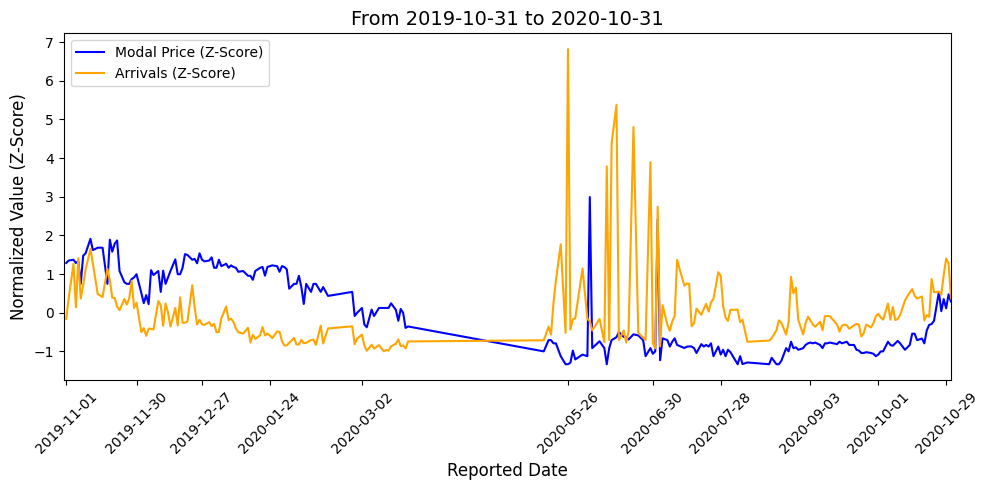

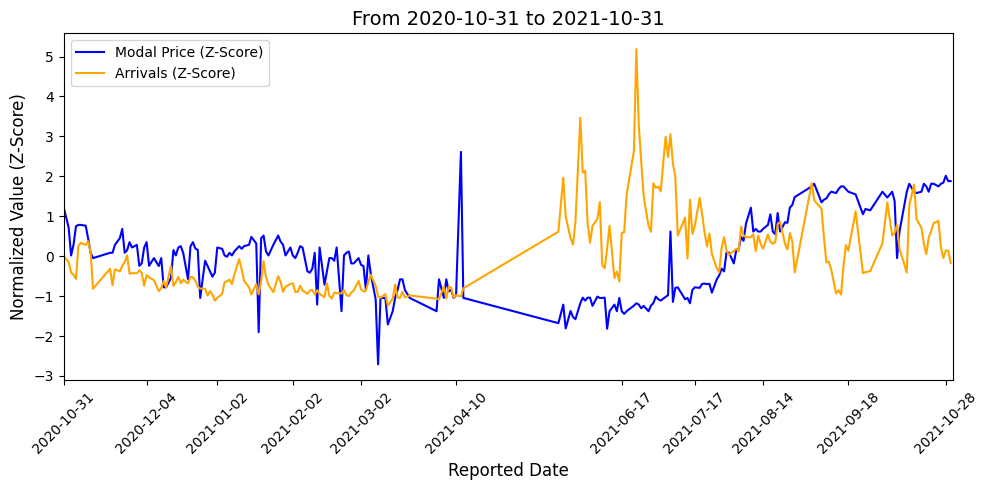

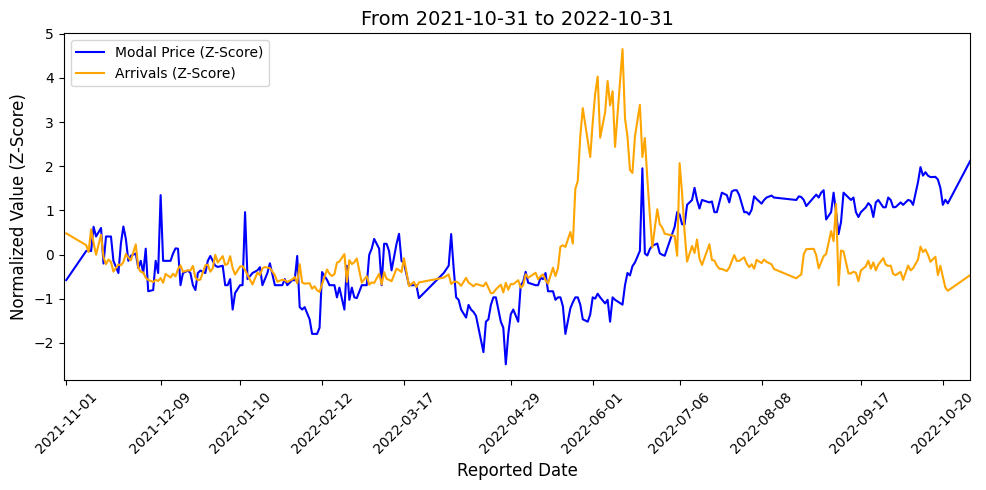

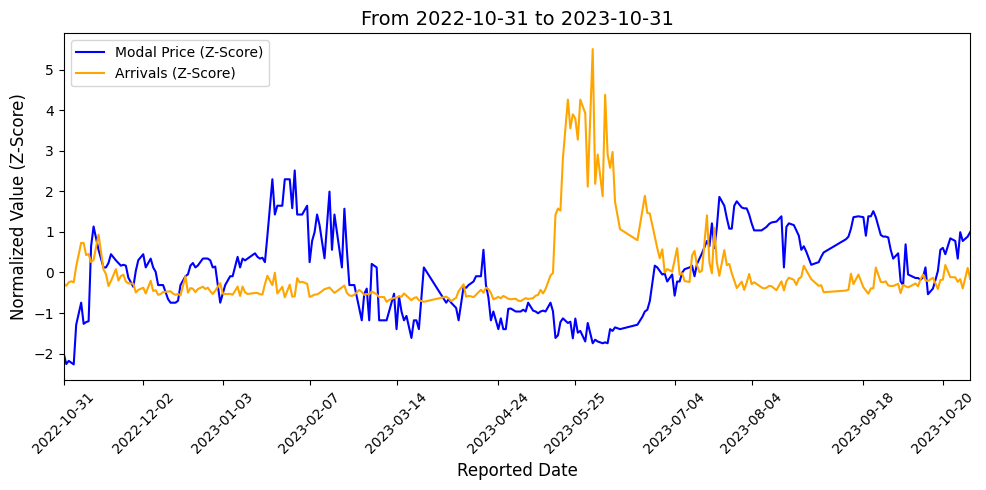

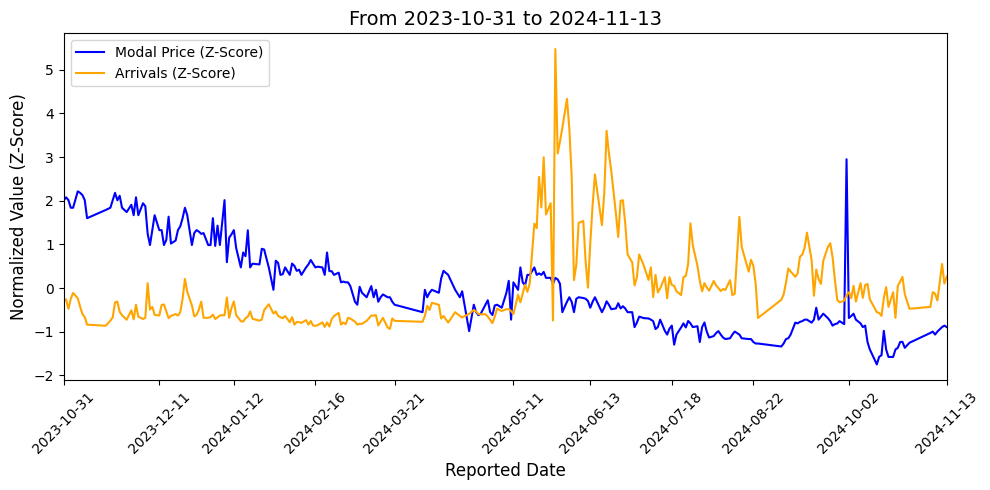

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Ensure the 'Reported Date' column is in datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y')

# Create a list of date ranges for the 5-year periods
date_ranges = [
    ('2019-10-31', '2020-10-31'),
    ('2020-10-31', '2021-10-31'),
    ('2021-10-31', '2022-10-31'),
    ('2022-10-31', '2023-10-31'),
    ('2023-10-31', '2024-11-13')
]

# Create separate DataFrames for each date range and store them in a dictionary
dfs = {}
for i, (start_date, end_date) in enumerate(date_ranges):
    dfs[f"df_{i+1}"] = df[(df['Reported Date'] >= start_date) & (df['Reported Date'] <= end_date)].copy()
    dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal) Z'] = zscore(dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal)'])
    dfs[f"df_{i+1}"]['Arrivals (Tonnes) Z'] = zscore(dfs[f"df_{i+1}"]['Arrivals (Tonnes)'])

# Plot each DataFrame independently
for i, (key, filtered_df) in enumerate(dfs.items()):
    plt.figure(figsize=(10, 5))

    # Plot the normalized 'Modal Price (Rs./Quintal)' and 'Arrivals (Tonnes)'
    plt.plot(filtered_df['Reported Date'], filtered_df['Modal Price (Rs./Quintal) Z'], label='Modal Price (Z-Score)', color='blue', linestyle='-', markersize=4)
    plt.plot(filtered_df['Reported Date'], filtered_df['Arrivals (Tonnes) Z'], label='Arrivals (Z-Score)', color='orange', linestyle='-', markersize=4)

    # Set titles and labels
    plt.title(f"From {date_ranges[i][0]} to {date_ranges[i][1]}", fontsize=14)
    plt.ylabel('Normalized Value (Z-Score)', fontsize=12)
    plt.xlabel('Reported Date', fontsize=12)
    plt.legend(loc='upper left')

    # Set x-axis limits and ticks for the specific date range
    plt.xlim(pd.to_datetime(date_ranges[i][0]), pd.to_datetime(date_ranges[i][1]))
    tick_interval = max(1, len(filtered_df) // 10)
    plt.xticks(filtered_df['Reported Date'][::tick_interval], rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [149]:
df

,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
2096,2019-11-01,108.5,10650
2316,2019-11-02,165.5,10725
2470,2019-11-04,265.0,10750
2249,2019-11-05,141.0,10650
2487,2019-11-06,281.0,10700
...,...,...,...
2083,2024-11-08,106.0,11500
1937,2024-11-09,88.0,11600
2357,2024-11-11,185.0,11750
2220,2024-11-12,133.0,11800


In [150]:
df.set_index('Reported Date', inplace=True)

In [151]:
import pandas as pd

target_map = df['Modal Price (Rs./Quintal)'].to_dict()

def create_features(df):
    """
    Create time series features based on time series index for weekly forecasting.
    """
    df = df.copy()

    # Time-based features
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    # Lag features
    df['lag14'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    df['lag28'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    df['lag42'] = (df.index - pd.Timedelta('42 days')).map(target_map)
    df['lag56'] = (df.index - pd.Timedelta('56 days')).map(target_map)

    # Rolling window features
    for window in [14, 28, 42, 56]:
        df[f'rolling_mean_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).mean()
        df[f'rolling_median_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).median()
        df[f'rolling_std_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).std()

    # Exponential moving averages
    df['ema14'] = df['Modal Price (Rs./Quintal)'].ewm(span=14, adjust=False).mean()
    df['ema28'] = df['Modal Price (Rs./Quintal)'].ewm(span=28, adjust=False).mean()

    # Moving averages
    df['moving_avg_14'] = df['Modal Price (Rs./Quintal)'].rolling(window=14, min_periods=1).mean()
    df['moving_avg_28'] = df['Modal Price (Rs./Quintal)'].rolling(window=28, min_periods=1).mean()

    # Other statistical features
    df['max_56'] = df['Modal Price (Rs./Quintal)'].rolling(window=56, min_periods=1).max()
    df['min_56'] = df['Modal Price (Rs./Quintal)'].rolling(window=56, min_periods=1).min()
    df['range_56'] = df['max_56'] - df['min_56']

    return df


In [152]:
df = create_features(df)
df

,Arrivals (Tonnes),Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,...,rolling_mean_56,rolling_median_56,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56
Reported Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,108.5,10650,4,4,11,2019,305,44,NaN,NaN,...,10650.000000,10650.0,NaN,10650.000000,10650.000000,10650.000000,10650.000000,10650.0,10650.0,0.0
2019-11-02,165.5,10725,5,4,11,2019,306,44,NaN,NaN,...,10687.500000,10687.5,53.033009,10660.000000,10655.172414,10687.500000,10687.500000,10725.0,10650.0,75.0
2019-11-04,265.0,10750,0,4,11,2019,308,45,NaN,NaN,...,10708.333333,10725.0,52.041650,10672.000000,10661.712247,10708.333333,10708.333333,10750.0,10650.0,100.0
2019-11-05,141.0,10650,1,4,11,2019,309,45,NaN,NaN,...,10693.750000,10687.5,51.538820,10669.066667,10660.904506,10693.750000,10693.750000,10750.0,10650.0,100.0
2019-11-06,281.0,10700,2,4,11,2019,310,45,NaN,NaN,...,10695.000000,10700.0,44.721360,10673.191111,10663.600747,10695.000000,10695.000000,10750.0,10650.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,106.0,11500,4,4,11,2024,313,45,11255.0,11000.0,...,11659.375000,11612.5,901.428696,11323.917917,11437.679172,11173.214286,11603.750000,17375.0,10500.0,6875.0
2024-11-09,88.0,11600,5,4,11,2024,314,45,11055.0,NaN,...,11663.392857,11612.5,900.639221,11360.728861,11448.873712,11230.000000,11591.250000,17375.0,10500.0,6875.0
2024-11-11,185.0,11750,0,4,11,2024,316,46,11225.0,10500.0,...,11670.535714,11687.5,899.694230,11412.631680,11469.641042,11238.928571,11587.678571,17375.0,10500.0,6875.0


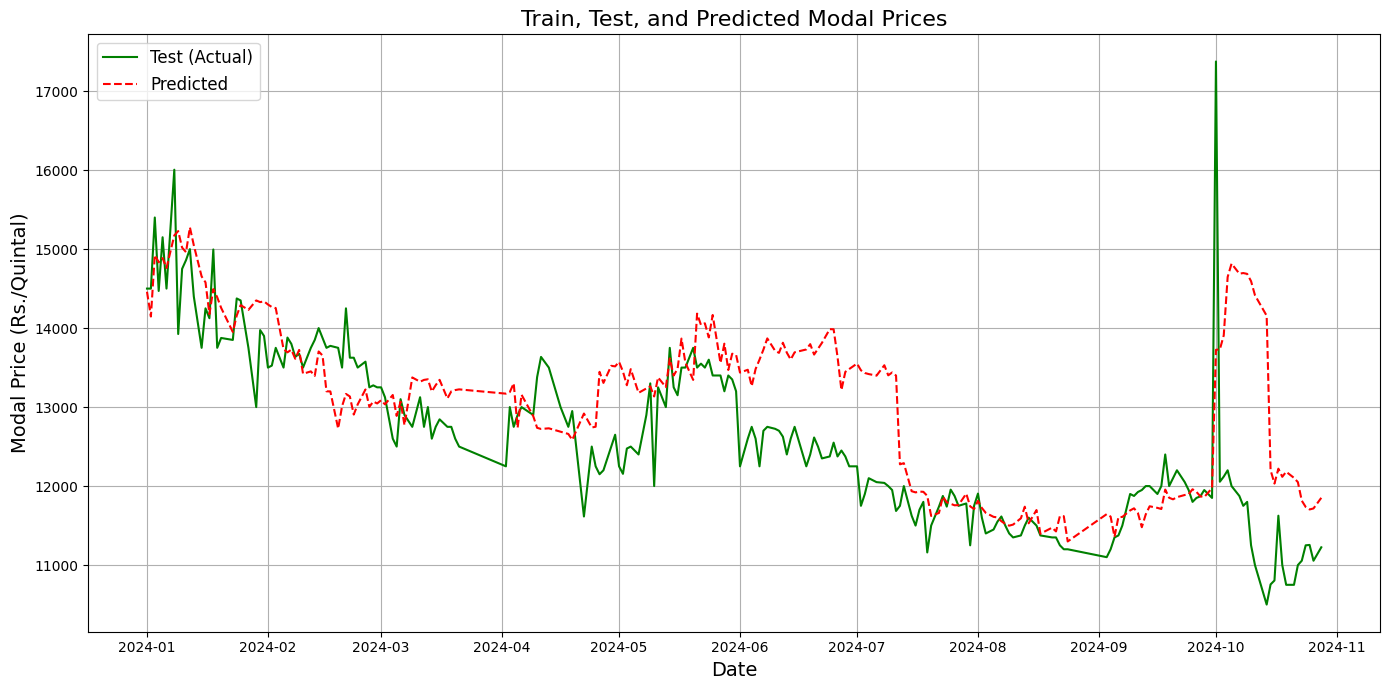

Metrics:
Mean Absolute Error (MAE): 649.0107
Symmetric Mean Absolute Percentage Error (SMAPE): 5.0198
Median Absolute Percentage Error (MDAPE): 3.4760
Geometric Mean Relative Absolute Error (GMRAE): 0.6103


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-10-31']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))


# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Train, Test, and Predicted Modal Prices", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [154]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming X_train, y_train, X_test, and y_test are defined
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'booster': ['gbtree', 'dart']
}

# Generate all combinations of hyperparameters
param_combinations = list(product(
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['n_estimators'],
    param_grid['booster']
))

# Store results for comparison
results = []

# Iterate through each parameter combination
for params in param_combinations:
    # Unpack parameters
    learning_rate, max_depth, n_estimators, booster = params

    # Define the model with the current parameters
    model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        booster=booster,
        random_state=42
    )

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate performance using MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Save the results
    results.append({
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'n_estimators': n_estimators,
        'booster': booster,
        'mae': mae
    })

    print(f"Evaluated params: {params} | MAE: {mae:.4f}")

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Find the best parameters (lowest MAE)
best_params = results_df.loc[results_df['mae'].idxmin()]

# Print the best parameters and corresponding score
print("\nBest Parameters:")
print(best_params)

# Train the final model with the best parameters
final_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']),
    n_estimators=int(best_params['n_estimators']),
    booster=best_params['booster'],
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Calculate metrics for the final model
final_mae = mean_absolute_error(y_test, y_pred_final)
print(f"\nFinal Model MAE: {final_mae:.4f}")

# Output the final predictions for visualization or further analysis
print("\nFinal Predictions:")
print(pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_final}, index=y_test.index))


Evaluated params: (0.01, 3, 50, 'gbtree') | MAE: 786.1130
Evaluated params: (0.01, 3, 50, 'dart') | MAE: 786.1130
Evaluated params: (0.01, 3, 100, 'gbtree') | MAE: 555.0914
Evaluated params: (0.01, 3, 100, 'dart') | MAE: 555.0914
Evaluated params: (0.01, 3, 150, 'gbtree') | MAE: 521.2918
Evaluated params: (0.01, 3, 150, 'dart') | MAE: 521.2917
Evaluated params: (0.01, 5, 50, 'gbtree') | MAE: 832.5903
Evaluated params: (0.01, 5, 50, 'dart') | MAE: 832.5903
Evaluated params: (0.01, 5, 100, 'gbtree') | MAE: 648.5210
Evaluated params: (0.01, 5, 100, 'dart') | MAE: 648.5210
Evaluated params: (0.01, 5, 150, 'gbtree') | MAE: 616.8108
Evaluated params: (0.01, 5, 150, 'dart') | MAE: 616.8108
Evaluated params: (0.01, 7, 50, 'gbtree') | MAE: 849.5312
Evaluated params: (0.01, 7, 50, 'dart') | MAE: 849.5312
Evaluated params: (0.01, 7, 100, 'gbtree') | MAE: 653.5605
Evaluated params: (0.01, 7, 100, 'dart') | MAE: 653.5605
Evaluated params: (0.01, 7, 150, 'gbtree') | MAE: 620.9188
Evaluated params: (

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


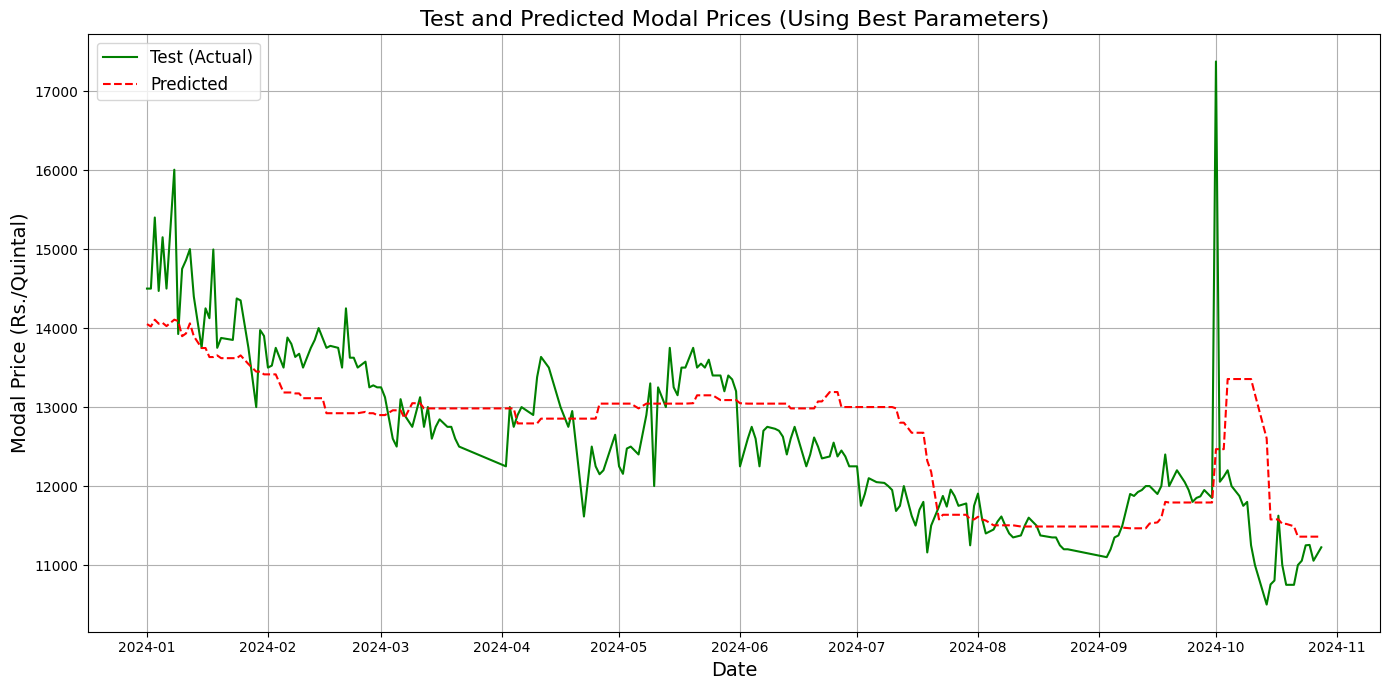

Metrics:
Mean Absolute Error (MAE): 521.2917
Symmetric Mean Absolute Percentage Error (SMAPE): 4.0723
Median Absolute Percentage Error (MDAPE): 3.2727
Geometric Mean Relative Absolute Error (GMRAE): 0.5685


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-10-31']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Initialize the model with the best parameters
model = XGBRegressor(**best_params)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Test and Predicted Modal Prices (Using Best Parameters)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [156]:
def calculate_biweekly_metrics(test_data, y_test, y_pred):
    # Ensure the index is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(test_data.index):
        raise TypeError("The index of test_data must be a datetime type.")

    weekly_metrics = []

    # Group by 2-week periods using the index
    for period, period_data in test_data.groupby(pd.Grouper(freq='2W')):
        # Get the integer positions of the indices using get_indexer
        positions = test_data.index.get_indexer(period_data.index)

        # Get actual and predicted values for the current 2-week period
        period_y_true = y_test.iloc[positions]  # Use iloc for integer-based indexing
        period_y_pred = y_pred[positions]  # Use integer-based indexing for numpy array

        # Calculate the metrics for this period
        mae_period = mean_absolute_error(period_y_true, period_y_pred)
        smape_period = smape(period_y_true.values, period_y_pred)
        mdape_period = mdape(period_y_true.values, period_y_pred)
        gmrae_period = gmrae(period_y_true.values, period_y_pred)

        # Store the metrics for the 2-week period
        weekly_metrics.append({
            'Period': period,
            'MAE': mae_period,
            'SMAPE': smape_period,
            'MDAPE': mdape_period,
            'GMRAE': gmrae_period
        })

    return pd.DataFrame(weekly_metrics)

# Calculate 2-week metrics
biweekly_metrics_df = calculate_biweekly_metrics(test_data, y_test, y_pred)

# Print the 2-week metrics
print("2-Week Period Metrics:")
print(biweekly_metrics_df)


2-Week Period Metrics:
       Period          MAE      SMAPE      MDAPE         GMRAE
0  2024-01-07   699.319336   4.822570   3.289692  1.921541e+00
1  2024-01-21   666.394368   4.619294   3.508248  7.818908e-01
2  2024-02-04   388.110156   2.827614   2.948437  1.703344e+00
3  2024-02-18   640.271566   4.764367   4.822791  1.243328e+01
4  2024-03-03   580.078857   4.367958   4.278942  5.066818e+00
5  2024-03-17   216.370650   1.685262   1.829680  1.184194e+00
6  2024-03-31   333.284180   2.603875   2.435809  3.404930e+00
7  2024-04-14   379.755968   2.922860   1.829680  1.171325e+00
8  2024-04-28   534.991455   4.274103   3.879049  1.208843e+00
9  2024-05-12   542.341353   4.265532   4.349961  1.998564e+00
10 2024-05-26   373.359375   2.802070   2.778557  2.524072e+00
11 2024-06-09   376.494141   2.925906   2.323177  1.010491e+00
12 2024-06-23   483.586204   3.791676   3.316793  3.672323e+00
13 2024-07-07   831.745295   6.598066   6.589086  5.460775e+00
14 2024-07-21  1006.751790   8.2

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


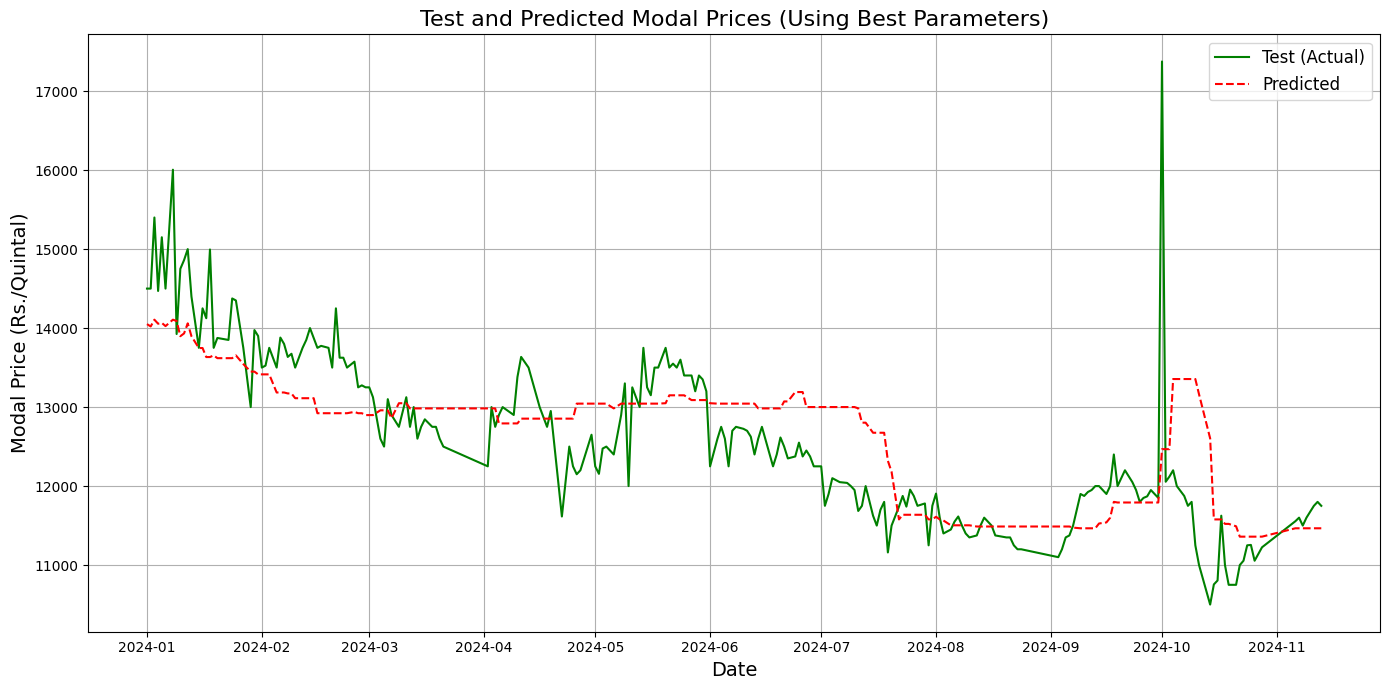

Metrics:
Mean Absolute Error (MAE): 511.2752
Symmetric Mean Absolute Percentage Error (SMAPE): 3.9986
Median Absolute Percentage Error (MDAPE): 3.0419
Geometric Mean Relative Absolute Error (GMRAE): 0.5422


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-13']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Initialize the model with the best parameters
model = XGBRegressor(**best_params)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Test and Predicted Modal Prices (Using Best Parameters)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


Sliding Window Metrics:
Mean Absolute Error (MAE): 521.2917
Symmetric Mean Absolute Percentage Error (SMAPE): 4.0723
Median Absolute Percentage Error (MDAPE): 3.2727
Geometric Mean Relative Absolute Error (GMRAE): 0.5685


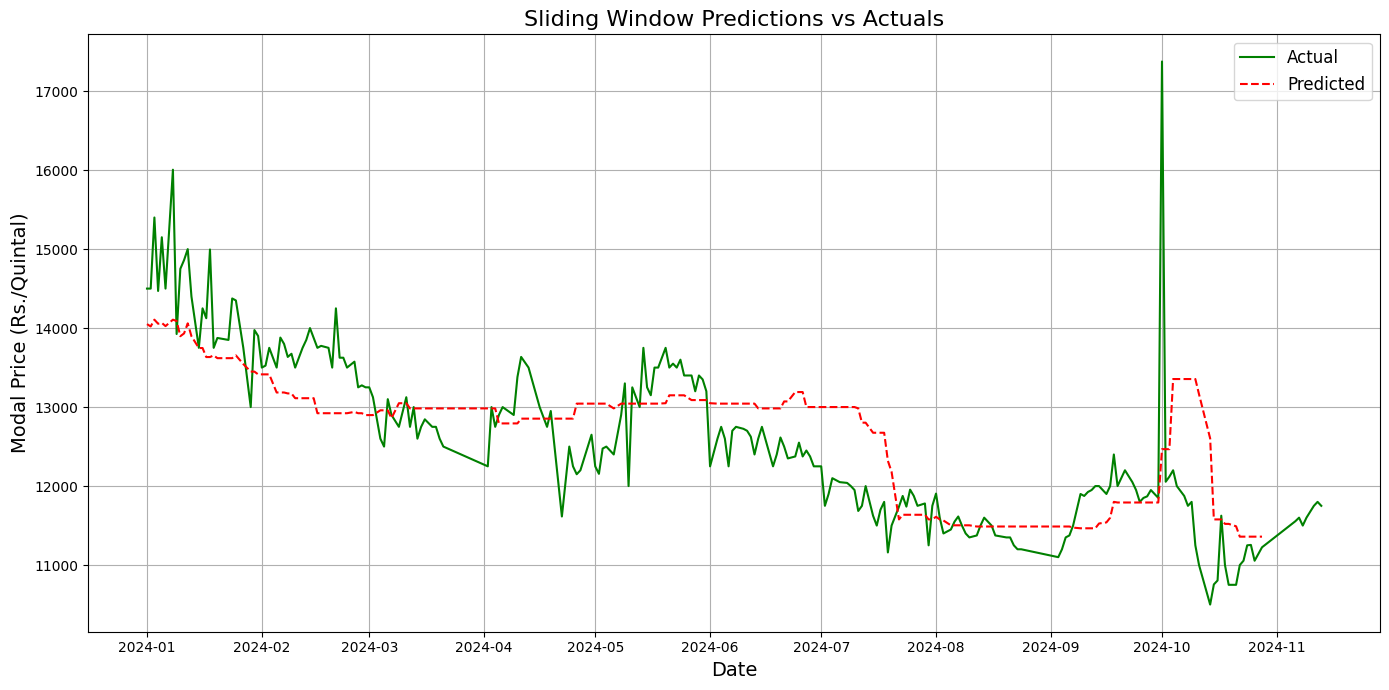

In [158]:
from datetime import timedelta

# Define the sliding window size (2 weeks)
window_size = 14  # Days

# Initialize results storage
all_predictions = []
all_actuals = []

# Start the sliding window process
current_start = test_data.index.min()
current_end = current_start + timedelta(days=window_size - 1)

while current_end <= test_data.index.max():
    # Extract the current window data
    current_window = test_data.loc[current_start:current_end]

    # Extract features and target for the current window
    X_current = current_window[feature_columns]
    y_actual = current_window['Modal Price (Rs./Quintal)']

    # Make predictions for the current window
    y_pred_current = model.predict(X_current)

    # Store predictions and actual values
    all_predictions.extend(y_pred_current)
    all_actuals.extend(y_actual.values)

    # Move the window forward
    current_start = current_end + timedelta(days=1)
    current_end = current_start + timedelta(days=window_size - 1)

# Calculate metrics for the entire test set based on sliding window predictions
mae = mean_absolute_error(all_actuals, all_predictions)
smape_val = smape(np.array(all_actuals), np.array(all_predictions))
mdape_val = mdape(np.array(all_actuals), np.array(all_predictions))
gmrae_val = gmrae(np.array(all_actuals), np.array(all_predictions))

# Print metrics
print("Sliding Window Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Actual', color='green')
plt.plot(test_data.index[:len(all_predictions)], all_predictions, label='Predicted', color='red', linestyle='--')
plt.title("Sliding Window Predictions vs Actuals", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [159]:
df

,Arrivals (Tonnes),Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,...,rolling_mean_56,rolling_median_56,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56
Reported Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,108.5,10650,4,4,11,2019,305,44,NaN,NaN,...,10650.000000,10650.0,NaN,10650.000000,10650.000000,10650.000000,10650.000000,10650.0,10650.0,0.0
2019-11-02,165.5,10725,5,4,11,2019,306,44,NaN,NaN,...,10687.500000,10687.5,53.033009,10660.000000,10655.172414,10687.500000,10687.500000,10725.0,10650.0,75.0
2019-11-04,265.0,10750,0,4,11,2019,308,45,NaN,NaN,...,10708.333333,10725.0,52.041650,10672.000000,10661.712247,10708.333333,10708.333333,10750.0,10650.0,100.0
2019-11-05,141.0,10650,1,4,11,2019,309,45,NaN,NaN,...,10693.750000,10687.5,51.538820,10669.066667,10660.904506,10693.750000,10693.750000,10750.0,10650.0,100.0
2019-11-06,281.0,10700,2,4,11,2019,310,45,NaN,NaN,...,10695.000000,10700.0,44.721360,10673.191111,10663.600747,10695.000000,10695.000000,10750.0,10650.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,106.0,11500,4,4,11,2024,313,45,11255.0,11000.0,...,11659.375000,11612.5,901.428696,11323.917917,11437.679172,11173.214286,11603.750000,17375.0,10500.0,6875.0
2024-11-09,88.0,11600,5,4,11,2024,314,45,11055.0,NaN,...,11663.392857,11612.5,900.639221,11360.728861,11448.873712,11230.000000,11591.250000,17375.0,10500.0,6875.0
2024-11-11,185.0,11750,0,4,11,2024,316,46,11225.0,10500.0,...,11670.535714,11687.5,899.694230,11412.631680,11469.641042,11238.928571,11587.678571,17375.0,10500.0,6875.0


In [160]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Import the necessary function
df = create_features(df)
df_vis = df.copy()
df = df.iloc[df.index<='2024-10-31']
TARGET = 'Modal Price (Rs./Quintal)'
X_all = df.drop(columns=[TARGET])
y_all = df[TARGET]
reg = xgb.XGBRegressor(**best_params)
print(best_params)
reg.fit(X_all, y_all, eval_set=[(X_all, y_all), (X_all, y_all)],verbose=100)

learning_rate          0.01
max_depth                 3
n_estimators            150
booster                dart
mae              521.291722
Name: 5, dtype: object
[0]	validation_0-rmse:2625.97466	validation_1-rmse:2625.97466


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:1067.51941	validation_1-rmse:1067.51941
[149]	validation_0-rmse:743.24482	validation_1-rmse:743.24482


XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=np.float64(0.01),
             mae=np.float64(521.2917223478619), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=np.int64(3), max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=np.int64(150), n_jobs=None,
             num_parallel_tree=None, ...)

In [161]:
#Create future dataframe
future = pd.date_range('2024-10-31', '2024-11-13', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)

In [162]:
future_w_features = df_and_future.query('isFuture').copy()

In [163]:
future_w_features2

,Arrivals (Tonnes),Scaled Arrivals,Scaled Modal Price,dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,...,rolling_mean_56,rolling_median_56,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56
2024-10-31,NaN,NaN,NaN,3,4,10,2024,305,44,11625.0,...,11661.272727,11625.0,909.624067,11203.292203,11410.748734,11001.923077,11628.518519,17375.0,10500.0,6875.0
2024-11-01,NaN,NaN,NaN,4,4,11,2024,306,44,11000.0,...,11662.407407,11687.5,918.126035,11203.292203,11410.748734,11043.750000,11620.000000,17375.0,10500.0,6875.0
2024-11-02,NaN,NaN,NaN,5,4,11,2024,307,44,10750.0,...,11665.471698,11750.0,926.633311,11203.292203,11410.748734,11070.000000,11610.000000,17375.0,10500.0,6875.0
2024-11-03,NaN,NaN,NaN,6,4,11,2024,308,44,NaN,...,11671.057692,11775.0,934.772352,11203.292203,11410.748734,11096.500000,11595.833333,17375.0,10500.0,6875.0
2024-11-04,NaN,NaN,NaN,0,4,11,2024,309,45,10750.0,...,11677.352941,11800.0,942.959889,11203.292203,11410.748734,11037.777778,11584.782609,17375.0,10500.0,6875.0
2024-11-05,NaN,NaN,NaN,1,4,11,2024,310,45,11000.0,...,11683.900000,11800.0,951.361693,11203.292203,11410.748734,11042.500000,11321.590909,17375.0,10500.0,6875.0
2024-11-06,NaN,NaN,NaN,2,4,11,2024,311,45,11055.0,...,11692.755102,11800.0,959.136472,11203.292203,11410.748734,11084.285714,11286.666667,17375.0,10500.0,6875.0
2024-11-07,NaN,NaN,NaN,3,4,11,2024,312,45,11250.0,...,11703.020833,11825.0,966.562091,11203.292203,11410.748734,11140.000000,11245.000000,17375.0,10500.0,6875.0
2024-11-08,NaN,NaN,NaN,4,4,11,2024,313,45,11255.0,...,11713.723404,11850.0,974.132539,11203.292203,11410.748734,11168.000000,11194.736842,17375.0,10500.0,6875.0
2024-11-09,NaN,NaN,NaN,5,4,11,2024,314,45,11055.0,...,11727.065217,11850.0,980.545526,11203.292203,11410.748734,11196.250000,11150.000000,17375.0,10500.0,6875.0


In [164]:
future_w_features2 = future_w_features.drop(columns=[TARGET, 'isFuture'])
future_w_features['pred'] = reg.predict(future_w_features2)
future_w_features2

,Arrivals (Tonnes),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,lag42,...,rolling_mean_56,rolling_median_56,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56
2024-10-31,NaN,3,4,10,2024,305,44,11625.0,12120.0,12000.0,...,11661.272727,11625.0,909.624067,11203.292203,11410.748734,11001.923077,11628.518519,17375.0,10500.0,6875.0
2024-11-01,NaN,4,4,11,2024,306,44,11000.0,12200.0,12100.0,...,11662.407407,11687.5,918.126035,11203.292203,11410.748734,11043.750000,11620.000000,17375.0,10500.0,6875.0
2024-11-02,NaN,5,4,11,2024,307,44,10750.0,12000.0,12200.0,...,11665.471698,11750.0,926.633311,11203.292203,11410.748734,11070.000000,11610.000000,17375.0,10500.0,6875.0
2024-11-03,NaN,6,4,11,2024,308,44,NaN,NaN,NaN,...,11671.057692,11775.0,934.772352,11203.292203,11410.748734,11096.500000,11595.833333,17375.0,10500.0,6875.0
2024-11-04,NaN,0,4,11,2024,309,45,10750.0,11875.0,12050.0,...,11677.352941,11800.0,942.959889,11203.292203,11410.748734,11037.777778,11584.782609,17375.0,10500.0,6875.0
2024-11-05,NaN,1,4,11,2024,310,45,11000.0,11750.0,11950.0,...,11683.900000,11800.0,951.361693,11203.292203,11410.748734,11042.500000,11321.590909,17375.0,10500.0,6875.0
2024-11-06,NaN,2,4,11,2024,311,45,11055.0,11800.0,11800.0,...,11692.755102,11800.0,959.136472,11203.292203,11410.748734,11084.285714,11286.666667,17375.0,10500.0,6875.0
2024-11-07,NaN,3,4,11,2024,312,45,11250.0,11250.0,11850.0,...,11703.020833,11825.0,966.562091,11203.292203,11410.748734,11140.000000,11245.000000,17375.0,10500.0,6875.0
2024-11-08,NaN,4,4,11,2024,313,45,11255.0,11000.0,11870.0,...,11713.723404,11850.0,974.132539,11203.292203,11410.748734,11168.000000,11194.736842,17375.0,10500.0,6875.0
2024-11-09,NaN,5,4,11,2024,314,45,11055.0,NaN,11950.0,...,11727.065217,11850.0,980.545526,11203.292203,11410.748734,11196.250000,11150.000000,17375.0,10500.0,6875.0


In [165]:
future_w_features

,Arrivals (Tonnes),Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,...,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56,isFuture,pred
2024-10-31,NaN,NaN,3,4,10,2024,305,44,11625.0,12120.0,...,909.624067,11203.292203,11410.748734,11001.923077,11628.518519,17375.0,10500.0,6875.0,True,11345.449219
2024-11-01,NaN,NaN,4,4,11,2024,306,44,11000.0,12200.0,...,918.126035,11203.292203,11410.748734,11043.750000,11620.000000,17375.0,10500.0,6875.0,True,11352.899414
2024-11-02,NaN,NaN,5,4,11,2024,307,44,10750.0,12000.0,...,926.633311,11203.292203,11410.748734,11070.000000,11610.000000,17375.0,10500.0,6875.0,True,11352.899414
2024-11-03,NaN,NaN,6,4,11,2024,308,44,NaN,NaN,...,934.772352,11203.292203,11410.748734,11096.500000,11595.833333,17375.0,10500.0,6875.0,True,11352.899414
2024-11-04,NaN,NaN,0,4,11,2024,309,45,10750.0,11875.0,...,942.959889,11203.292203,11410.748734,11037.777778,11584.782609,17375.0,10500.0,6875.0,True,11362.041992
2024-11-05,NaN,NaN,1,4,11,2024,310,45,11000.0,11750.0,...,951.361693,11203.292203,11410.748734,11042.500000,11321.590909,17375.0,10500.0,6875.0,True,11362.041992
2024-11-06,NaN,NaN,2,4,11,2024,311,45,11055.0,11800.0,...,959.136472,11203.292203,11410.748734,11084.285714,11286.666667,17375.0,10500.0,6875.0,True,11362.041992
2024-11-07,NaN,NaN,3,4,11,2024,312,45,11250.0,11250.0,...,966.562091,11203.292203,11410.748734,11140.000000,11245.000000,17375.0,10500.0,6875.0,True,11362.041992
2024-11-08,NaN,NaN,4,4,11,2024,313,45,11255.0,11000.0,...,974.132539,11203.292203,11410.748734,11168.000000,11194.736842,17375.0,10500.0,6875.0,True,11362.041992
2024-11-09,NaN,NaN,5,4,11,2024,314,45,11055.0,NaN,...,980.545526,11203.292203,11410.748734,11196.250000,11150.000000,17375.0,10500.0,6875.0,True,11362.041992


<Axes: title={'center': 'Future Predictions'}>

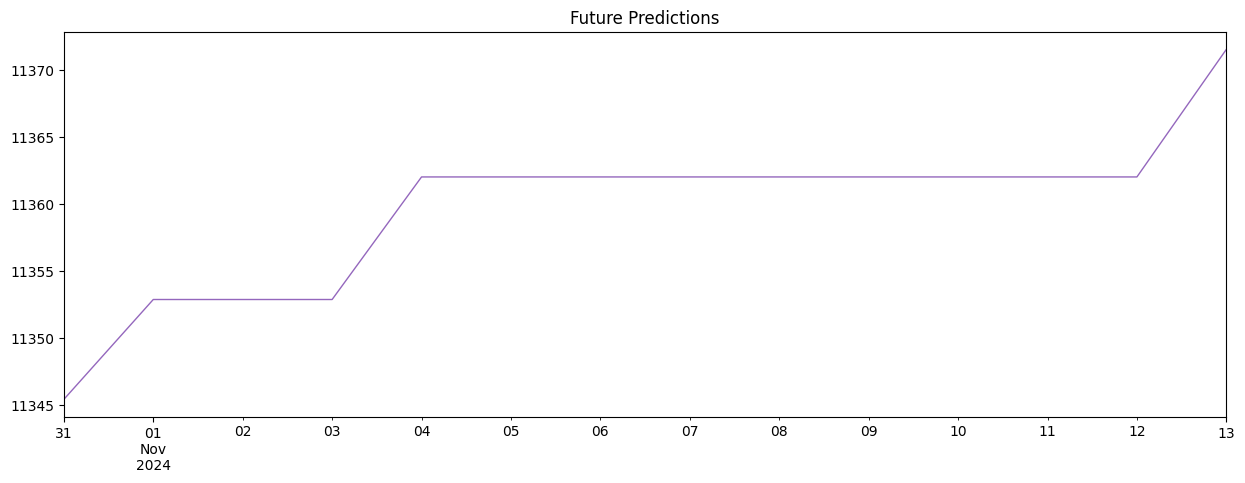

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

color_pal = plt.cm.tab10.colors
future_w_features['pred'].plot(figsize=(15, 5), color=color_pal[4], ms=1, lw=1, title='Future Predictions')

<Axes: title={'center': 'Future Predictions'}>

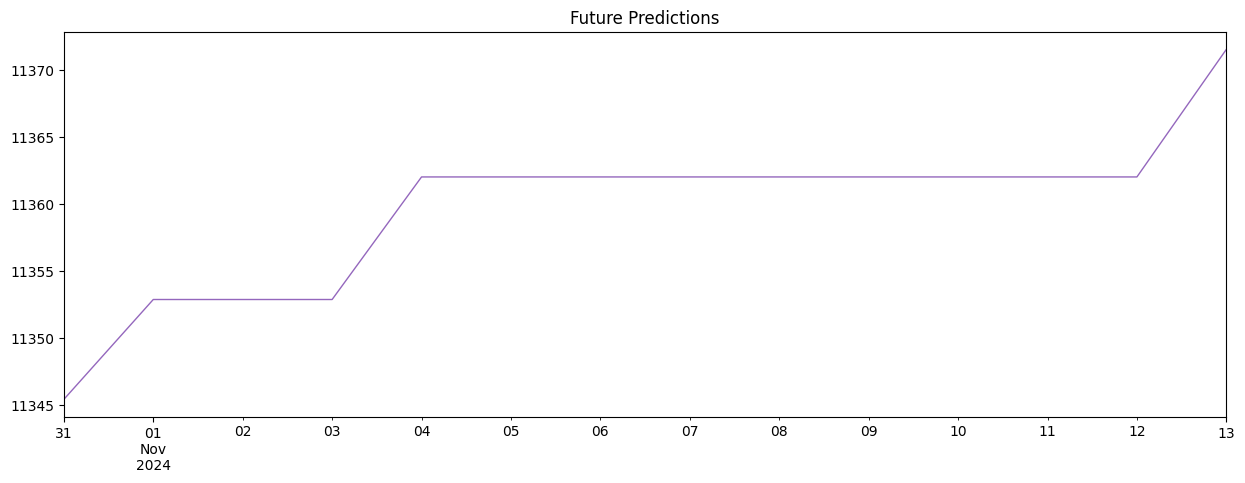

In [167]:
future_w_features['pred'].plot(figsize=(15, 5), color=color_pal[4], ms=1, lw=1, title='Future Predictions')

In [168]:
df_new = pd.read_csv("Data_new.csv")
df_new

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,68.0,14850,20400,18500,16 Nov 2024
1,Gujarat,Rajkot,Rajkot,White,Oil Seeds,110.0,10000,13125,11600,07 Nov 2024
2,Gujarat,Rajkot,Rajkot,White,Oil Seeds,185.0,10250,13790,11750,11 Nov 2024
3,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,106.0,14500,20000,18500,08 Nov 2024
4,Gujarat,Rajkot,Rajkot,White,Oil Seeds,88.0,10000,13500,11600,09 Nov 2024
5,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,71.0,14250,19950,17500,06 Nov 2024
6,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,128.0,14700,20600,18000,18 Nov 2024
7,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,143.0,14720,21320,18125,20 Nov 2024
8,Gujarat,Rajkot,Rajkot,White,Oil Seeds,93.5,10500,13500,11750,19 Nov 2024
9,Gujarat,Rajkot,Rajkot,Black,Oil Seeds,133.0,14700,19875,17500,12 Nov 2024


In [169]:
df_new = df_new[df_new["Variety"]=="White"]
df_new

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
1,Gujarat,Rajkot,Rajkot,White,Oil Seeds,110.0,10000,13125,11600,07 Nov 2024
2,Gujarat,Rajkot,Rajkot,White,Oil Seeds,185.0,10250,13790,11750,11 Nov 2024
4,Gujarat,Rajkot,Rajkot,White,Oil Seeds,88.0,10000,13500,11600,09 Nov 2024
8,Gujarat,Rajkot,Rajkot,White,Oil Seeds,93.5,10500,13500,11750,19 Nov 2024
10,Gujarat,Rajkot,Rajkot,White,Oil Seeds,68.0,10500,13550,11950,16 Nov 2024
11,Gujarat,Rajkot,Rajkot,White,Oil Seeds,143.0,10750,14000,11900,20 Nov 2024
12,Gujarat,Rajkot,Rajkot,White,Oil Seeds,152.0,10500,13600,11650,21 Nov 2024
14,Gujarat,Rajkot,Rajkot,White,Oil Seeds,133.0,10750,14000,11800,12 Nov 2024
17,Gujarat,Rajkot,Rajkot,White,Oil Seeds,106.0,10000,12750,11500,08 Nov 2024
21,Gujarat,Rajkot,Rajkot,White,Oil Seeds,128.0,10250,13750,11650,18 Nov 2024


In [170]:
df_new['Reported Date'] = pd.to_datetime(df_new['Reported Date'], format='%d %b %Y').dt.date
df_new = df_new[['Reported Date', 'Arrivals (Tonnes)', 'Modal Price (Rs./Quintal)']]
df_new = df_new.sort_values(by='Reported Date', ascending=True)
df_new

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_24982/360327841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Reported Date'] = pd.to_datetime(df_new['Reported Date'], format='%d %b %Y').dt.date


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
22,2024-11-06,71.0,11555
1,2024-11-07,110.0,11600
17,2024-11-08,106.0,11500
4,2024-11-09,88.0,11600
2,2024-11-11,185.0,11750
14,2024-11-12,133.0,11800
23,2024-11-13,151.0,11750
10,2024-11-16,68.0,11950
21,2024-11-18,128.0,11650
8,2024-11-19,93.5,11750


In [171]:
start_date = "2024-11-01"
end_date = df_new['Reported Date'].max()

# Generate a list of all dates between the start and end date
all_dates = pd.date_range(start=start_date, end=end_date).date

# Find missing dates by comparing with the actual dates in the dataframe
missing_dates = set(all_dates) - set(df_new['Reported Date'])

# Output the missing dates and their count
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Total missing dates: {len(missing_dates)}")

Start Date: 2024-11-01
End Date: 2024-11-21
Missing dates: [datetime.date(2024, 11, 1), datetime.date(2024, 11, 2), datetime.date(2024, 11, 3), datetime.date(2024, 11, 4), datetime.date(2024, 11, 5), datetime.date(2024, 11, 10), datetime.date(2024, 11, 14), datetime.date(2024, 11, 15), datetime.date(2024, 11, 17)]
Total missing dates: 9


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


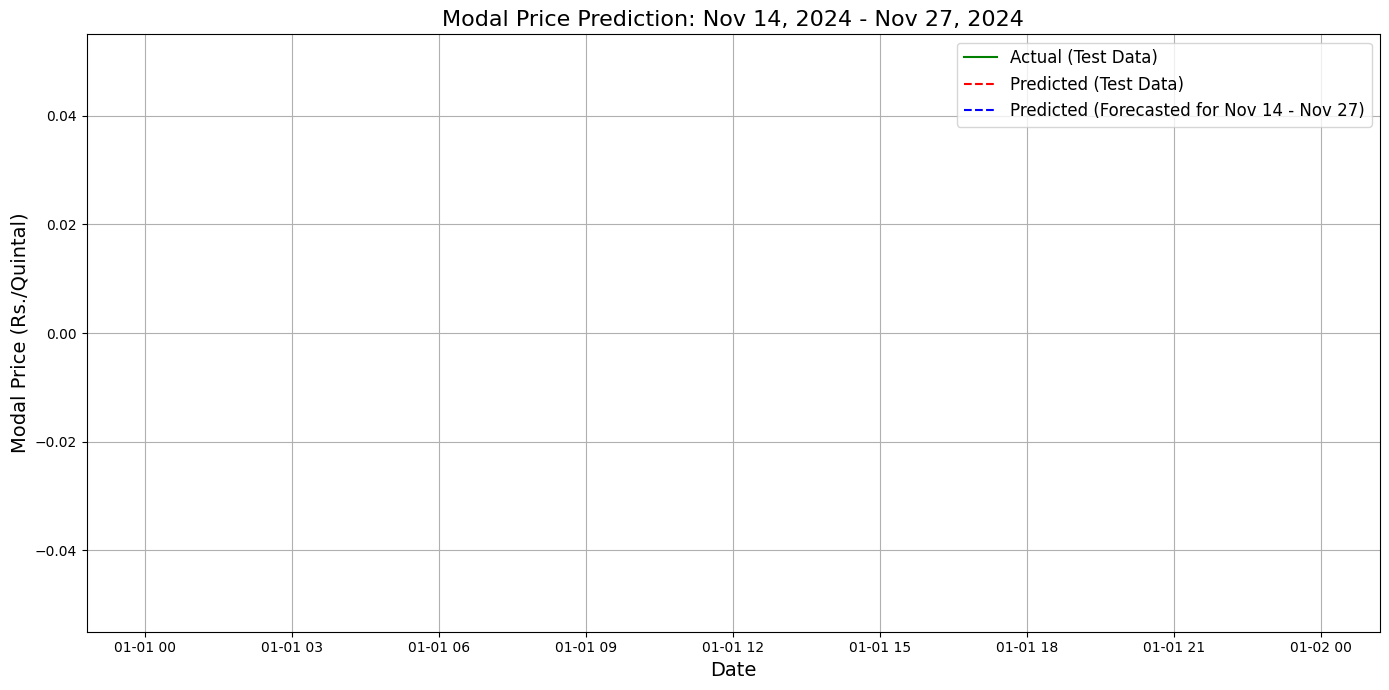

Reported Date
2024-01-01    14050.342773
2024-01-02    14020.846680
2024-01-03    14106.302734
2024-01-04    14055.418945
2024-01-05    14066.030273
                  ...     
2024-10-23    11359.751953
2024-10-24    11359.751953
2024-10-25    11359.751953
2024-10-26    11359.751953
2024-10-28    11359.751953
Name: Predicted, Length: 228, dtype: float32

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `create_feature(df)` is defined and generates the required feature DataFrame for prediction.
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-13']  # Last 2 weeks known data ends at Nov 13, 2024

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Initialize the model with the best parameters
model = XGBRegressor(**best_params)

# Train the model
model.fit(X_train, y_train)

# Predict for the last two weeks
y_pred_last_two_weeks = model.predict(X_test)

# Add predictions to the test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred_last_two_weeks

# Generate future features for the next two weeks
future_features = create_features(df)
future_features = future_features[feature_columns]

# Predict for the next two weeks
y_pred_next_two_weeks = model.predict(future_features)

# Prepare the future DataFrame
future_dates = future_features.index
future_df = pd.DataFrame({
    'Predicted': y_pred_next_two_weeks
}, index=future_dates)

# Ensure that the date index is in datetime format
test_data.index = pd.to_datetime(test_data.index)
future_df.index = pd.to_datetime(future_df.index)

# Filter data for the specific date range (Nov 14, 2024 - Nov 27, 2024)
plot_start_date = '2024-11-14'
plot_end_date = '2024-11-27'

# Filter the test data (actual values) for plotting
test_data_filtered = test_data[(test_data.index >= plot_start_date) & (test_data.index <= plot_end_date)]

# Filter the future predicted data for the same date range
future_df_filtered = future_df[(future_df.index >= plot_start_date) & (future_df.index <= plot_end_date)]

# Plotting
plt.figure(figsize=(14, 7))

# Plot the actual values for the filtered date range
plt.plot(test_data_filtered.index, test_data_filtered['Modal Price (Rs./Quintal)'],
         label='Actual (Test Data)', color='green')

# Plot the predicted values for the filtered date range
plt.plot(test_data_filtered.index, test_data_filtered['Predicted'],
         label='Predicted (Test Data)', color='red', linestyle='--')

# Plot the predicted values for the next two weeks (filtered date range)
plt.plot(future_df_filtered.index, future_df_filtered['Predicted'],
         label='Predicted (Forecasted for Nov 14 - Nov 27)', color='blue', linestyle='--')

# Add title and labels
plt.title("Modal Price Prediction: Nov 14, 2024 - Nov 27, 2024", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

test_data
